In [61]:

import numpy as np

import pandas as pd

In [62]:
df = pd.read_csv(r"C:\Users\anike\Documents\spam.csv",encoding='latin-1')



In [63]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2081,ham,I'm aight. Wat's happening on your side.,NaN,NaN,NaN
1746,ham,I don know account details..i will ask my mom ...,NaN,NaN,NaN
1145,spam,"Thank you, winner notified by sms. Good Luck! ...",NaN,NaN,NaN
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo...",NaN,NaN,NaN
3683,ham,Dad says hurry the hell up,NaN,NaN,NaN


In [64]:
df.shape



(5572, 5)

In [65]:
# 1.Data cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

## 1.Data cleaning

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
# drope last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [68]:
df.sample(5)

,v1,v2
1962,spam,it to 80488. Your 500 free text messages are v...
3455,ham,Ok. I.ll do you right later.
1047,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
4390,ham,The greatest test of courage on earth is to be...
1828,ham,May i call You later Pls


In [69]:
# renaming the cols
df.rename(columns={ 'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1775,ham,Did u see what I posted on your Facebook?
2264,ham,Ok . . now i am in bus. . If i come soon i wil...
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
3391,ham,What r u cooking me for dinner?
4135,ham,have you ever had one foot before?


In [70]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [71]:
df['target'] = encoder.fit_transform(df['target'])

In [72]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [75]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.shape

(5169, 2)

## EDA

In [78]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

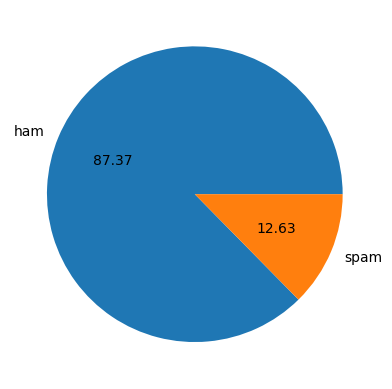

In [80]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [81]:
# data is imbalanced

In [82]:
import nltk

In [83]:
!pip install nltk

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
df['num_characters'] = df['text'].apply(len)

In [86]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
# ham
df[df['target']==0].describe()

,target,num_characters
count,4516.0,4516.000000
mean,0.0,70.459256
std,0.0,56.358207
min,0.0,2.000000
25%,0.0,34.000000
50%,0.0,52.000000
75%,0.0,90.000000
max,0.0,910.000000


In [88]:
# spam
df[df['target']==1].describe()

,target,num_characters
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [89]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

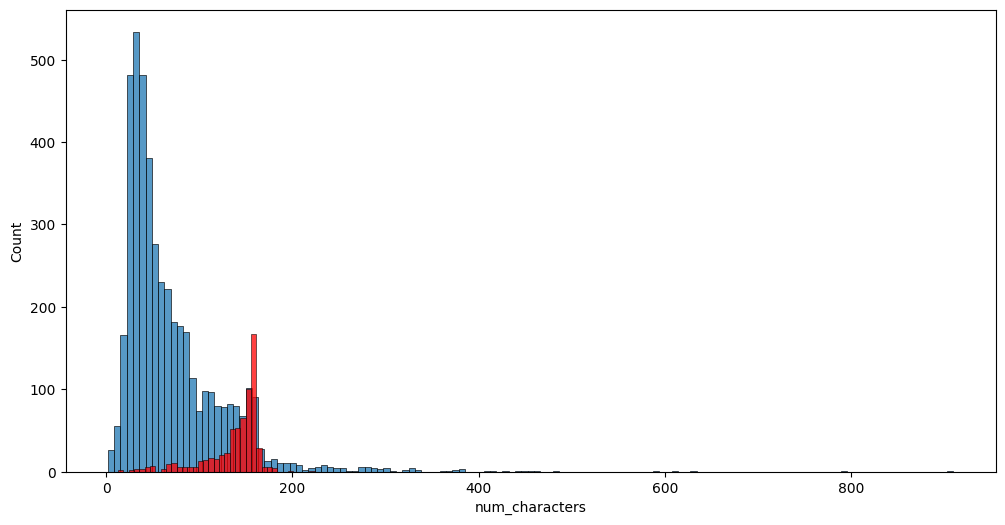

In [90]:
plt.figure(figsize=(12,6))
                    
sns.histplot (df[df['target']==0]['num_characters'])
sns.histplot (df[df['target']==1]['num_characters'],color='red')

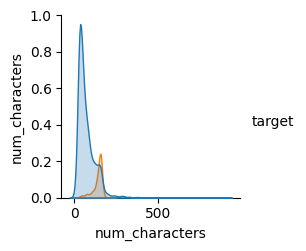

In [91]:
sns.pairplot(df,hue='target')

## 3. data preprocessing
. lowar case
. Tokenization
. Removing special characters
. removing stop words punctuation
. Stemming

In [103]:
import nltk
 
nltk.download('popular',quiet=True)
nltk.download('punkt_tab')
nltk.download('stopwords')  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [105]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:] 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [106]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [107]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [115]:
df['transform_text']= df['text'].apply(transform_text)

In [116]:
df.head()

,target,text,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [60]:
!pip install WordCloud

In [61]:
from wordcloud import WordCloud
wc=WordCloud (width=5000,height=5000,min_font_size=100,background_color='white')

In [62]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

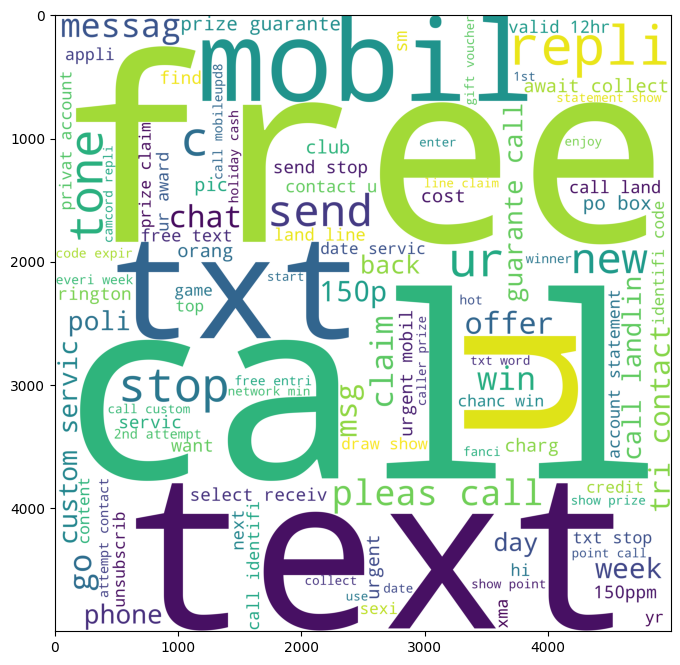

In [63]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [64]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

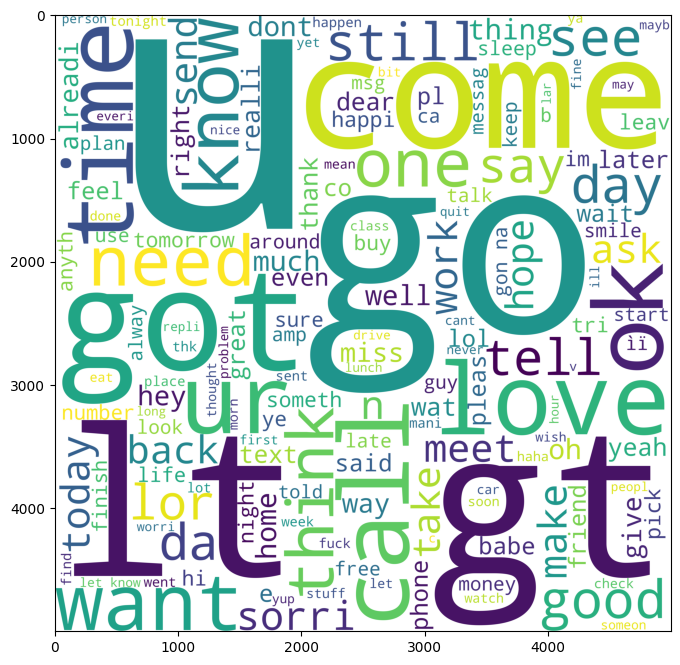

In [65]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [67]:
df.head()

,target,text,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [68]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [69]:
len(spam_corpus)

9939

In [70]:
!pip install collection

<Axes: ylabel='0'>

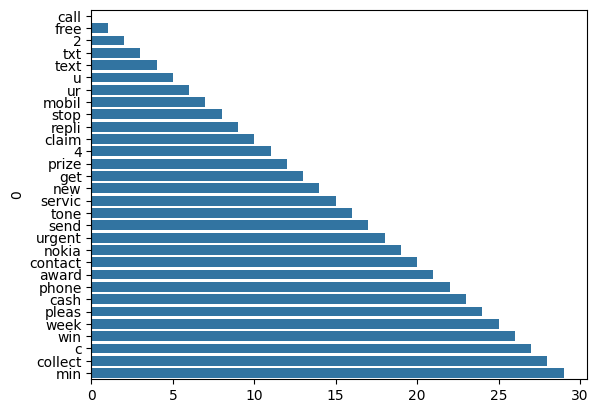

In [71]:
import pandas as pd
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [72]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [73]:
len(ham_corpus)

35404

<Axes: ylabel='0'>

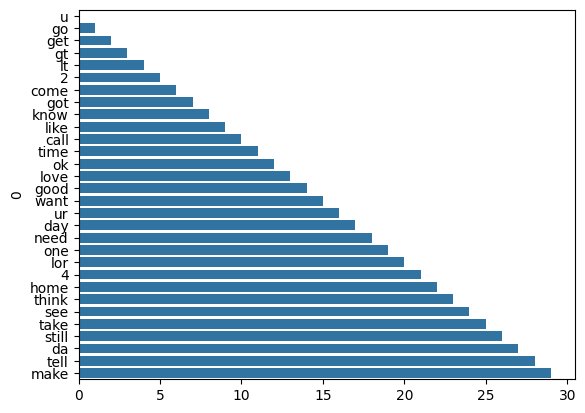

In [74]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

## 4.model building

In [150]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [151]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [152]:
X.shape

(5169, 3000)

In [153]:
y =df['target'].values

In [154]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [157]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [158]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [159]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [160]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [161]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [162]:
# tfidf -->MNB

In [163]:
! pip install xgboost

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
 

In [165]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l2')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [166]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb  
}

In [167]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [168]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [169]:
from sklearn.metrics import accuracy_score, precision_score


In [170]:
accuracy_scores =[]
precision_scores =[]

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)


    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9332688588007737
Precision - 0.8415841584158416
For LR
Accuracy - 0.9545454545454546
Precision - 0.9789473684210527
For RF
Accuracy - 0.9738878143133463
Precision - 0.9826086956521739


C:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9690522243713733
Precision - 0.9732142857142857
For Bgc
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For xgb
Accuracy - 0.965183752417795
Precision - 0.9396551724137931


In [172]:
# model improve

In [173]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))